In [2]:
# https://keras.io/

#Statement start with "!" is a command in Colab.
#The following command will quitly install keras python module from python packaging index
#After installing keras, it is being imported

!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
#numpy is imported with "np" as kind of alias. 
#From here on we can use np instead of numpy.
import numpy as np

#The following would import relevant models and layer. 
#Also, we have imported the mnist data set.

from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Convolution2D
from keras.utils import np_utils

from keras.datasets import mnist

In [5]:
# Load MNIST data set into training data and test set data
# There are 70,000 images with their labels in MNIST dataset.
# Randomly, 60k will be loaded into X_train and their corresponding labels y_train.
# Remaining 10k images will be loaded into X_test and their labels y_test.

(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)


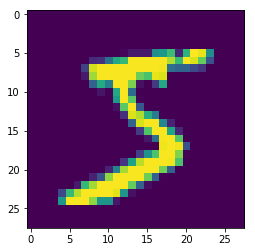

In [7]:

#Printing the shape of Training data set
#From this print statement, there are 60,000 images in X train of size 28X28.
#Correspoindingly, y_train is a column matrics of size 60000
print (X_train.shape)

# Using plt.imshow method from matplot library, the first image is printed. y[0] will be have a value of 5.
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
#Convert the images in training dataset and test set into multidimentional arrays of their pixel intensity values.
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)


In [0]:
#Convert the pixel intensity values into floating point value and normalize the pixel intensities by dividing with 255. Max value of pixel intensity is 255.
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [11]:
#Print the first 10 labels in the y_train column matrics.

y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices

# This will convert the numbers in the Y_train and y_test into column metrics of size 10. Element corresponding to the number will have value 1 and all other elements will be 0.
# For example, 5 will be represented by the column matrics [0,0,0,0,1,0,0,0,0,0]

Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [13]:
#Print first 10 elements in the Y_train after converting into catogorical matrices.

Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [14]:
from keras.layers import Activation, MaxPooling2D

model = Sequential() 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1))) # Receptive Field is 3, Channel Dimention : (3x3X1)x(32), output image dimention 26X26
model.add(Convolution2D(64, 3, 3, activation='relu'))                        # Receptive Field is 5, Channel Dimention : (3x3X32)x(64), output image dimention 24X24
model.add(Convolution2D(128, 3, 3, activation='relu'))                       # Receptive Field is 7, Channel Dimention : (3x3X64)x(128), output image dimention 22X22

model.add(MaxPooling2D(pool_size=(2, 2)))                                    # Receptive Field is 7, Channel Dimention : (3x3)x(128), output image dimention 11X11

model.add(Convolution2D(256, 3, 3, activation='relu'))                       # Receptive Field is 9, Channel Dimention : (3x3X128)x(256), output image dimention 9X9
model.add(Convolution2D(512, 3, 3, activation='relu'))                       # Receptive Field is 11, Channel Dimention : (3x3X256)x(512), output image dimention 7X7
model.add(Convolution2D(1024, 3, 3, activation='relu'))                      # Receptive Field is 13, Channel Dimention : (3x3X512)x(1024), output image dimention 5X5
model.add(Convolution2D(2048, 3, 3, activation='relu'))                      # Receptive Field is 15, Channel Dimention : (3x3X1024)x(2048), output image dimention 3X3
model.add(Convolution2D(10, 3, 3, activation='relu'))                        # Receptive Field is 17, Channel Dimention : (3x3X2048)x(10), output image dimention 1X1

model.add(Flatten())                                                         # Receptive Field is 17, Channel Dimention : (3x3)x(10), output image dimention 1X1
model.add(Activation('softmax'))                                             # Receptive Field is 17, Channel Dimention : (3x3)x(10), output image dimention 1X1

model.summary()

Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(512, (3, 3), activation="relu")`
  # This is added back by InteractiveShellApp.init

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 9, 9, 256)         295168    
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 512)         1180160   
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 5, 5, 1024)        4719616   
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [16]:
# 60k images training images will be trained in batches of 32 images at a time. 
# One epoch consists of (60k/32 = 1875) forward propagations followed by one backward propagation
# Network will be trained for 10 epoches and after the training, model will have the weights.

model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Epoch 1/10
60000/60000 [==============================] - 117s 2ms/step - loss: 2.0454 - acc: 0.2184
Epoch 2/10
60000/60000 [==============================] - 113s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 3/10
60000/60000 [==============================] - 114s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 4/10
60000/60000 [==============================] - 115s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 5/10
60000/60000 [==============================] - 115s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 6/10
60000/60000 [==============================] - 115s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 7/10
60000/60000 [==============================] - 115s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 8/10
60000/60000 [==============================] - 115s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 9/10
60000/60000 [==============================] - 115s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 10/10
60000/60000 [==============================] - 115s 2ms/step - loss: 2.3026 - a

In [0]:
# For each of 10k images in the testset, predict the labels and check how many of them are matching with Y_test. Based this arrive at a score.
score = model.evaluate(X_test, Y_test, verbose=0)

In [19]:
#Print the score
print(score)

[2.3025851249694824, 0.098]


In [0]:
# For each of 10k images in the testset, predict the labels

y_pred = model.predict(X_test)

In [21]:
# For first 9 images in the testset, print the predicted labels and the actual labels from the y_test

print(y_pred[:9])
print(y_test[:9])

[[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]]
[7 2 1 0 4 1 4 9 5]


In [0]:
# Improvements to the network

# There should be 1x1 before Max pooling to select the kernals

# model.add(MaxPooling2D(pool_size=(2, 2)))  should be changed to model.add(MaxPooling2D(2, 2))

# 1x1 convolution should be used to reduce the number of kernals to 10

# Last 3x3 convolution should NOT have activation ReLu. 
#Otherwise softmax will not be able to normalize the probability values to 10 distingushed values in 0 to 1 range.


# Model should be changed to the following:


model = Sequential() 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))# Receptive Field is 3, Channel Dimention : (3x3X1)x(32), output image dimention 26X26
model.add(Convolution2D(64, 3, 3, activation='relu'))                       # Receptive Field is 5, Channel Dimention : (3x3X32)x(64), output image dimention 24X24
model.add(Convolution2D(128, 3, 3, activation='relu'))                      # Receptive Field is 7, Channel Dimention : (3x3X64)x(128), output image dimention 22X22
model.add(Convolution2D(32, 1,activation='relu'))
model.add(MaxPooling2D(2, 2))                                    

model.add(Convolution2D(32, 3, 3, activation='relu'))                       # Receptive Field is 9, Channel Dimention : (3x3X128)x(256), output image dimention 9X9
model.add(Convolution2D(64, 3, 3, activation='relu'))                       # Receptive Field is 11, Channel Dimention : (3x3X256)x(512), output image dimention 7X7
model.add(Convolution2D(128, 3, 3, activation='relu'))                      # Receptive Field is 13, Channel Dimention : (3x3X512)x(1024), output image dimention 5X5
model.add(Convolution2D(256, 3, 3, activation='relu'))                      # Receptive Field is 15, Channel Dimention : (3x3X1024)x(2048), output image dimention 3X3
model.add(Convolution2D(10, 1,activation='relu'))

model.add(Convolution2D(10, 3, 3))                                          # Receptive Field is 17, Channel Dimention : (3x3X2048)x(10), output image dimention 1X1


model.add(Flatten())                                                        # Receptive Field is 17, Channel Dimention : (3x3)x(10), output image dimention 1X1
model.add(Activation('softmax'))                                            # Receptive Field is 17, Channel Dimention : (3x3)x(10), output image dimention 1X1

model.summary()